In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
usedcars = pd.read_csv('outliers_cleaned_usedcars.csv')


 Correlation Analysis

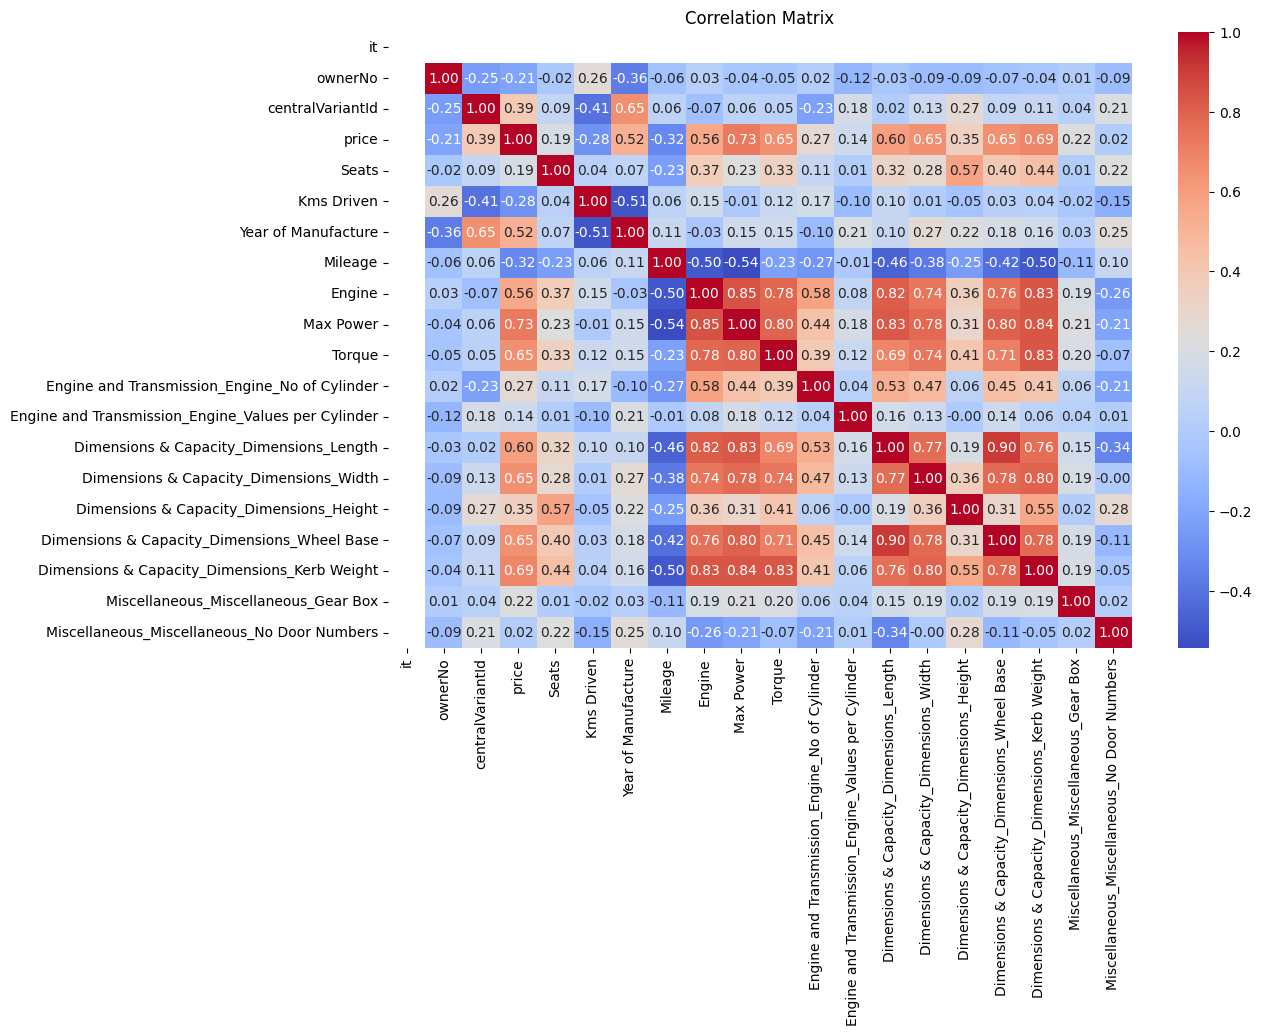

Features highly correlated with price: ['Year of Manufacture', 'Engine', 'Max Power', 'Torque', 'Dimensions & Capacity_Dimensions_Length', 'Dimensions & Capacity_Dimensions_Width', 'Dimensions & Capacity_Dimensions_Wheel Base', 'Dimensions & Capacity_Dimensions_Kerb Weight']


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'usedcars' is your DataFrame

# Selecting only numeric columns for correlation analysis
numeric_cols = usedcars.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = usedcars[numeric_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Extracting features with high correlation with 'price'
correlation_threshold = 0.5
high_corr_features = correlation_matrix.index[abs(correlation_matrix['price']) > correlation_threshold].tolist()

# Remove 'price' from the list
high_corr_features.remove('price')
print("Features highly correlated with price:", high_corr_features)


Feature Importance 

In [3]:
import pandas as pd
import scipy.stats as stats

# Load the CSV file into a DataFrame
usedcars = pd.read_csv(r'C:\CARPRICEPREDICTION\virtualenvironment\outliers_cleaned_usedcars.csv')

# Identify categorical columns based on their data types
categorical_features = usedcars.select_dtypes(include=['object', 'int64']).columns

# Remove any columns that should not be treated as categorical
# (e.g., columns with too many unique values might be numerical in nature)
categorical_features = [col for col in categorical_features if usedcars[col].nunique() < 20]

# Apply ANOVA test
anova_results = {}
for feature in categorical_features:
    # Check if there are more than one unique values for the feature
    if usedcars[feature].nunique() > 1:
        groups = [usedcars['price'][usedcars[feature] == category] for category in usedcars[feature].unique()]
        try:
            f_val, p_val = stats.f_oneway(*groups)
            anova_results[feature] = {'F-Score': f_val, 'P-Value': p_val}
        except TypeError as e:
            print(f"Error with feature {feature}: {e}")
            anova_results[feature] = {'F-Score': None, 'P-Value': None}

# Filter features with significant p-values (< 0.05)
significant_features = {feature: results for feature, results in anova_results.items() if results['P-Value'] is not None and results['P-Value'] < 0.05}

# Print all results
for feature, results in anova_results.items():
    print(f"Feature: {feature}, F-Score: {results['F-Score']}, P-Value: {results['P-Value']}")

print("\nSignificant categorical features from ANOVA:")
for feature, results in significant_features.items():
    print(f"Feature: {feature}, F-Score: {results['F-Score']}, P-Value: {results['P-Value']}")


Feature: city, F-Score: 22.625425259756202, P-Value: 1.4122343716107823e-22
Feature: bt, F-Score: 686.3903749582157, P-Value: 0.0
Feature: ownerNo, F-Score: 64.21599745009631, P-Value: 1.2269665283667484e-65
Feature: Insurance Validity, F-Score: 11.029631032305655, P-Value: 2.8702940138421516e-12
Feature: Fuel Type, F-Score: 155.47346283761578, P-Value: 2.388038984432946e-97
Feature: Seats, F-Score: 81.66962925439815, P-Value: 6.3087158953424725e-99
Feature: Transmission, F-Score: 1420.4314302938485, P-Value: 1.413862309655328e-281

Significant categorical features from ANOVA:
Feature: city, F-Score: 22.625425259756202, P-Value: 1.4122343716107823e-22
Feature: bt, F-Score: 686.3903749582157, P-Value: 0.0
Feature: ownerNo, F-Score: 64.21599745009631, P-Value: 1.2269665283667484e-65
Feature: Insurance Validity, F-Score: 11.029631032305655, P-Value: 2.8702940138421516e-12
Feature: Fuel Type, F-Score: 155.47346283761578, P-Value: 2.388038984432946e-97
Feature: Seats, F-Score: 81.6696292543

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'usedcars' is your DataFrame and 'price' is your target variable
X = usedcars.drop(columns=['price'])  # Features
y = usedcars['price']  # Target variable

# Convert categorical features to numeric using Label Encoding
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Convert to string to handle any non-numeric values
    label_encoders[col] = le

# Handle missing values (optional: fill with median for numeric columns)
X = X.fillna(X.median())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances and sort them
importances = model.feature_importances_
features = X.columns
feature_importances = pd.Series(importances, index=features).sort_values(ascending=False)

# Get the top 20 features
top_20_features = feature_importances.head(20)
print("Top 20 Features based on Random Forest Importance:")
print(top_20_features)

# Clean the list of final_features
final_features_cleaned = [feature for feature in top_20_features.index if feature in X.columns]

# Prepare the DataFrame for model training with cleaned feature list
X_selected = X[final_features_cleaned]


Top 20 Features based on Random Forest Importance:
Dimensions & Capacity_Dimensions_Width          0.415291
Year of Manufacture                             0.172181
Max Power                                       0.112843
Dimensions & Capacity_Dimensions_Kerb Weight    0.070735
Dimensions & Capacity_Dimensions_Wheel Base     0.032695
centralVariantId                                0.030950
Kms Driven                                      0.022309
Dimensions & Capacity_Dimensions_Length         0.022139
city                                            0.014881
Miscellaneous_Miscellaneous_Tyre Type           0.013731
Transmission                                    0.012520
variantName                                     0.011645
Torque                                          0.011434
Dimensions & Capacity_Dimensions_Height         0.008763
Mileage                                         0.006376
Engine and Transmission_Engine_Color            0.005058
model                                

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif

# Assuming 'usedcars' is your DataFrame and 'price' is your target variable
X = usedcars.drop(columns=['price'])  # Features
y = usedcars['price']  # Target variable

# Convert categorical features to numeric using Label Encoding
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Convert to string to handle any non-numeric values
    label_encoders[col] = le

# Remove constant features
constant_filter = VarianceThreshold(threshold=0.0)
X_non_constant = constant_filter.fit_transform(X)
non_constant_features = X.columns[constant_filter.get_support()]

# Create a DataFrame from the filtered features
X_non_constant_df = pd.DataFrame(X_non_constant, columns=non_constant_features)

# Handle missing values (fill with median for numeric columns)
X_non_constant_df = X_non_constant_df.fillna(X_non_constant_df.median())

# Ensure 'city' is included in features for selection
if 'city' not in X_non_constant_df.columns:
    X_non_constant_df['city'] = usedcars['city'].astype(str).map(lambda x: label_encoders['city'].transform([x])[0])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_non_constant_df, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from Random Forest
rf_importances = rf_model.feature_importances_
features = X_non_constant_df.columns
rf_feature_importances = pd.Series(rf_importances, index=features).sort_values(ascending=False)

# Get ANOVA F-Score
anova_f, anova_p = f_classif(X_non_constant_df, y)
anova_scores = pd.Series(anova_f, index=features).sort_values(ascending=False)

# Combine the two analyses
combined_importances = rf_feature_importances.add(anova_scores, fill_value=0)
top_combined_features = combined_importances.sort_values(ascending=False).head(20)

# Ensure 'city' is included
if 'city' not in top_combined_features.index:
    city_importance = pd.Series(rf_feature_importances['city'], index=['city'])
    top_combined_features = pd.concat([top_combined_features, city_importance])

print("Top 20 Features based on Combined Importance:")
print(top_combined_features)

# Clean the list of final_features
final_features_cleaned = [feature for feature in top_combined_features.index if feature in X_non_constant_df.columns]

# Prepare the DataFrame for model training with cleaned feature list
X_selected = X_non_constant_df[final_features_cleaned]


Top 20 Features based on Combined Importance:
Max Power                                        8.707092
Dimensions & Capacity_Dimensions_Width           7.780583
Year of Manufacture                              7.668606
Dimensions & Capacity_Dimensions_Kerb Weight     7.450450
Dimensions & Capacity_Dimensions_Wheel Base      6.486359
Torque                                           6.362028
Dimensions & Capacity_Dimensions_Length          5.163762
Engine                                           4.248710
centralVariantId                                 2.863456
Transmission                                     2.683051
bt                                               2.520562
Dimensions & Capacity_Dimensions_Height          2.102932
Mileage                                          1.965416
Engine and Transmission_Engine_No of Cylinder    1.947781
Insurance Validity                               1.914607
Kms Driven                                       1.832682
Miscellaneous_Miscellaneou

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

# Assuming 'usedcars' is your DataFrame and 'price' is your target variable
X = usedcars[['Max Power', 'Year of Manufacture', 'ownerNo', 'Engine', 'Transmission', 
              'bt','Fuel Type', 'Engine and Transmission_Engine_No of Cylinder', 
              'Insurance Validity', 'city']]
y = usedcars['price']

# Convert categorical features to numeric using Label Encoding
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col].astype(str))  # Convert to string to handle any non-numeric values
    label_encoders[col] = le

# Handle missing values
X = X.fillna(X.median())

# Scaling (choose one: MinMaxScaler or StandardScaler)
scaler = StandardScaler()  # or MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models and hyperparameter grids
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': GridSearchCV(Lasso(), {'alpha': [0.01, 0.1, 1, 10, 100]}, cv=5, n_jobs=-1),
    'Ridge Regression': GridSearchCV(Ridge(), {'alpha': [0.01, 0.1, 1, 10, 100]}, cv=5, n_jobs=-1),
    'Decision Tree': GridSearchCV(DecisionTreeRegressor(), {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}, cv=5, n_jobs=-1),
    'Random Forest': GridSearchCV(RandomForestRegressor(), {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}, cv=5, n_jobs=-1),
    'Gradient Boosting': GridSearchCV(GradientBoostingRegressor(), {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]}, cv=5, n_jobs=-1),
    'XGBoost': GridSearchCV(XGBRegressor(eval_metric='rmse'), {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]}, cv=5, n_jobs=-1)
}

# Train and evaluate models
results = {}
best_params = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}
    
    # Get the best parameters for GridSearchCV models
    if isinstance(model, GridSearchCV):
        best_params[name] = model.best_params_
    else:
        best_params[name] = 'N/A'

    print(f"{name}: MSE = {mse:.2f}, MAE = {mae:.2f}, R2 = {r2:.2f}")
    print(f"Best parameters: {best_params[name]}")

# Choose the best model based on R² score
best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model = models[best_model_name]

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Save the label encoders
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

# Save the best model
with open(f"{best_model_name.replace(' ', '_').replace('/', '_')}.pkl", 'wb') as file:
    pickle.dump(best_model, file)

print(f"Best model: {best_model_name} saved as pickle file.")


C:\Users\jrith\AppData\Local\Temp\ipykernel_7512\2120481844.py:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.fillna(X.median())


Training Linear Regression...
Linear Regression: MSE = 53367447604.38, MAE = 158974.18, R2 = 0.73
Best parameters: N/A
Training Lasso Regression...
Lasso Regression: MSE = 53372352414.01, MAE = 158968.40, R2 = 0.73
Best parameters: {'alpha': 100}
Training Ridge Regression...
Ridge Regression: MSE = 53366504999.54, MAE = 158973.24, R2 = 0.73
Best parameters: {'alpha': 1}
Training Decision Tree...


c:\CARPRICEPREDICTION\virtualenvironment\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Decision Tree: MSE = 28087452561.00, MAE = 104304.32, R2 = 0.86
Best parameters: {'max_depth': 10, 'min_samples_split': 5}
Training Random Forest...
Random Forest: MSE = 18391285679.49, MAE = 86186.37, R2 = 0.91
Best parameters: {'max_depth': 15, 'n_estimators': 150}
Training Gradient Boosting...
Gradient Boosting: MSE = 17870739062.32, MAE = 88169.13, R2 = 0.91
Best parameters: {'learning_rate': 0.2, 'n_estimators': 150}
Training XGBoost...
XGBoost: MSE = 15522060185.88, MAE = 80425.49, R2 = 0.92
Best parameters: {'learning_rate': 0.2, 'n_estimators': 100}
Best model: XGBoost saved as pickle file.


In [8]:
usedcars['Insurance Validity'].unique()


array(['Third Party insurance', 'Comprehensive', 'Third Party',
       'Zero Dep', '2', '1', 'Not Available'], dtype=object)

In [9]:
usedcars['city'].unique()

array(['bangalore', 'chennai', 'delhi', 'hyderabad', 'jaipur', 'kolkata'],
      dtype=object)

In [10]:
usedcars['bt'].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Minivans', 'Wagon'],
      dtype=object)

In [14]:
usedcars['Fuel Type'].unique()

array(['Petrol', 'Diesel', 'LPG', 'CNG'], dtype=object)

In [13]:
usedcars['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)